# CSE 4334/5334 Programming Assignment P2

## Fall 2018

## Due: 11:59pm Central Time, Wednesday, November 21, 2018

## 1. Introduction

Part of the materials in this instruction notebook are adapted from "Introduction to Machine Learning with Python" by Andreas C. Mueller and Sarah Guido.

To run the examples in this notebook and to finish your assignment, you need a few Python modules. If you already have a Python installation set up, you can use pip to install all of these packages:

$ pip install numpy matplotlib ipython jupyter scikit-learn pandas graphviz

In your python code, you will always need to import a subset of the following modules. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import sklearn


from IPython.display import display
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz


//anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## 2. The Breast Cancer Dataset

The first dataset that we use in this notebook is included in scikit-learn, a popular machine learning library for Python. The dataset is the Wisconsin Breast Cancer dataset, which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

The data can be loaded using the load_breast_cancer function from scikit-learn:

In [12]:
cancer = load_breast_cancer()
print(cancer.target)
print("cancer.keys(): {}".format(cancer.keys()))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Datasets that are included in scikit-learn are usually stored as Bunch objects, which contain some information about the dataset as well as the actual data. All you need to know about Bunch objects is that they behave like dictionaries, with the added benefit that you can access values using a dot (as in bunch.key instead of bunch['key']).

The dataset consists of 569 data points, with 30 features each:

In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [5]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'benign': 357, 'malignant': 212}


To get a description of the semantic meaning of each feature, we can have a look at the feature_names attribute:

In [6]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Let's print out the names of the features (attributes) and the values in the target (class attribute), and the first 3 instances in the dataset. 

In [14]:
print(cancer.feature_names,cancer.target_names)
for i in range(0,10):
    print(cancer.data[i], cancer.target[i])
    

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] ['malignant' 'benign']
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.622

You can find out more about the data by reading cancer.DESCR if you are interested.

## 3. k-Nearest Neighbor
#### k-Neighbors Classification

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance: 

In [11]:
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

Note that this function randomly partitions the dataset into training and test sets. The randomness is controlled by a pseudo random number generator, which generates random numbers using a seed. If you fix the seed, you will actually always get the same partition (thus no randomness). That is why we set random_state=0. (We can also use any other fixed number instead of 0, to acheive the same effect.) It guarantees that you reproduce the same results in every run. It is useful in testing your programs. However, in your real production code where randomness is needed, you shouldn't fix random_state. 

Next, we instantiate the KNeighborsClassifier class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 3:

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [13]:
knn.fit(train_feature, train_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [14]:
print("Test set predictions:\n{}".format(knn.predict(test_feature)))

Test set predictions:
[0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0]


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [15]:
print("Test set accuracy: {:.2f}".format(knn.score(test_feature, test_class)))

Test set accuracy: 0.92


We see that our model is about 92% accurate, meaning the model predicted the class correctly for 92% of the samples in the test dataset.

#### Analyzing KNeighborsClassifier

Let’s investigate whether we can confirm the connection between model complexity and generalization. For that, we evaluate training and test set performance with different numbers of neighbors. 

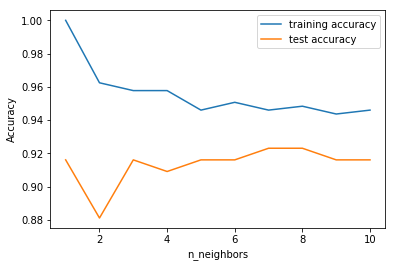

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_feature, train_class)
    # record training set accuracy
    training_accuracy.append(knn.score(train_feature, train_class))
    # record generalization accuracy
    test_accuracy.append(knn.score(test_feature, test_class))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. (It is not a typo. Yes, using less neighbors leads to more complex models. Think carefully about this.) The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

## 4. Linear Support Vector Machines

Linear support vector machines (linear SVMs) is implemented in svm.LinearSVC. Let's apply it on the brest cancer dataset. 

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

linearsvm = LinearSVC(random_state=0).fit(train_feature, train_class)
print("Test set score: {:.3f}".format(linearsvm.score(test_feature, test_class)))

Test set score: 0.825


## 5. Naive Bayes Classifiers

Naive Bayes classifiers are also implemented in scikit-learn. Since the features in the breast cancer dataset are all continuous numeric attributes, let's use GaussianNB. 

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

nb = GaussianNB().fit(train_feature, train_class)
print("Test set score: {:.3f}".format(nb.score(test_feature, test_class)))

Test set score: 0.923


## 6. Decision trees

Decision trees are also implmented in scikit-learn. Let's use DecisionTreeClassifier. 

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 1.000
Test set score: 0.937


If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. In the above code, we didn't set max_depth (i.e., max_depth= None,  which is the default value). Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split instances (min_samples_split is another parameter in DecisionTreeClassifier). Now let's set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 0.988
Test set score: 0.951


#### Analyzing Decision Trees

We can visualize the tree using the export_graphviz function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

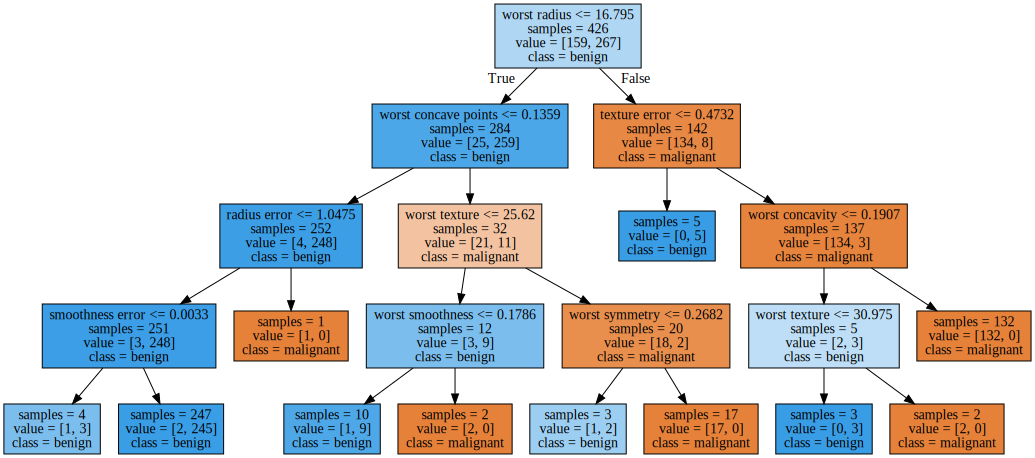

In [25]:
import graphviz
from IPython.display import display

with open("./tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#### Feature Importance in trees

Instead of looking at the whole tree, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [26]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


## 7. Model Evaluation

To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the train_test_split function, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples. 

### Confusion Matrix

scikit-learn has its own function for producing confusion matrix. But, let's use pandas which is a popular Python package for data analysis. Its crosstab function produces a better-looking confusion matrix. 

In [27]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

prediction = tree.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Training set score: 0.988
Test set score: 0.951
Confusion matrix:
Predicted   0   1  All
True                  
0          49   4   53
1           3  87   90
All        52  91  143


### Cross-Validation

The reason we split our data into training and test sets is that we are interested in measuring how well our model generalizes to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.
 
Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. Cross-validation is implemented in scikit-learn using the cross_val_score function from the model_selection module. The parameters of the cross_val_score function are the model we want to evaluate, the training data, and the ground-truth labels. Let’s evaluate DecisionTreeClassifier on the breast cancer dataset. We can control the number of folds used by setting the cv parameter. We also summarize the cross-validation accuracy by computing the mean accuracy of the multiple folds. 

scikit-learn uses stratified k-fold cross-validation for classification. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset. 

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.92173913  0.88695652  0.9380531   0.92920354  0.90265487]
Average cross-validation score: 0.92


## 8. How to Save Your Trained Model into a Pickle Object

Python’s pickle module serializes objects so that they can be saved to a file and loaded in a program again later on. Below we show how to save your model as a pickle object and how to load it back in your program.

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
import pickle

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
   cancer.data, cancer.target, stratify=cancer.target, random_state=0)

linearsvm = LinearSVC(random_state=0).fit(train_feature, train_class)
#store your trained model as pickle object
joblib.dump(linearsvm, 'SVM.pkl')

#load a pickle object
trained_model = joblib.load('SVM.pkl')
print("Test set score: {:.3f}".format(trained_model.score(test_feature, test_class)))

Test set score: 0.825


## 9. Details and How to Improve the Classifiers 

To figure out what parameters are available in the various classification methods, you can read more about the specifications of the corresponding Python classes: 

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

You can even read the following tutorials about these methods. 

http://scikit-learn.org/stable/modules/neighbors.html

http://scikit-learn.org/stable/modules/naive_bayes.html

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/tree.html

## 10. Programming Assignment

### Dataset

In this assigment, you will use a dataset that has claims related to U.S. congressional and electoral voting. The dataset (voting_data.csv) contains four types of claims, including claims related to 'In-progress/Eventual Results of Electoral Voting' denoted as 'E', 'Votes in Congressional Voting' denoted as 'V', 'Outcome of Congressional Voting' denoted as 'O', and claims not related to these three classes "Others". The dataset has only two columns: 'text' and 'label'.

All the files for this assignment can be downloaded from Blackboard ("Course Materials" > "Programming Assignments" > "Programming Assignment 2 (P2)" > "Attached Files").


### Programming Language

You are required to use Python 3.6.x. We will test your code under the particular version of Python 3.6.x. So make sure you develop your code using the same version. You are free to use anything from the Python Standard Library that comes with Python 3.6.x (https://docs.python.org/3.6/library/).


For classification algorithms, you are allowed to use scikit learn, a free machine learning library for Python (http://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

For feature extraction and data manupilation, you are allowed to use any of the following non-standard Python packages:

    Pandas (http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html)  
    Numpy (https://docs.scipy.org/doc/numpy/user/quickstart.html)    
    NLTK (https://www.nltk.org)
    spaCy (https://spacy.io) 
    Gensim (https://radimrehurek.com/gensim/)
    
In this assignment, you are not allowed to use any other non-standard Python package other than ones mentioned above.

### Tasks

In this assigment, you do multi-class classification to classify a sentence into one of the four classes ("E", "V", "O", "Others"). The goal is to achieve the best performance by exploring several different classifiers and features. You can define as many functions as you want, but your code must execute in the following three modes. Please also refer to section "Sample Output" below for the correct format of input and output. 

1) Training mode: The user will issue the command line below. 
        
            python P2.py --mode train  --input input_file
        
Your program will train your best model on the given input file. Use 75% of the input data for training and 25% for testing. Note that you should not set random_state to a fixed value, since this is the "production code". The trained model will be saved as a pickle object in the same directory with your code (refer to "How to use the pickle module" below). Then you need to evaluate your trained model by using the test data (i.e., 25% of the input file). Print out the classification report and the confusion matrix for the trained model. Note that there are four classes of claims. Hence the confusion matrix should be 5 x 5, since we are also reporting the results for "All". 

2) Cross_validation mode: The user will issue the command line below. 

            python P2.py --mode cross_val --input input_file

You need to use the same mothod with the same parameters in 1). However, instead of using 75%/25% train/test split, apply 10-fold stratified cross-validation. Print out the accuracy of each fold and print out the average accuracy across all the folds. 
                
3) Predict mode: The user will issue the command line below. 

            python P2.py --mode predict --input input_sentence

You need to load the pretrained model that you saved as pickle object in 1) and use that to make predictions on the input sentence.            

### Sample Output

--> python P2.py --mode train  --input voting_data.csv

Classification Report:

                     precision    recall  f1-score   support

                  E       0.89      0.57      0.70        14
                  O       0.82      0.82      0.82        11
             Others       0.72      0.78      0.75        23
                  V       0.89      0.97      0.93        34
          
        avg / total       0.83      0.83      0.82        82

Confusion Matrix:

        Predicted  E   O  Others   V  All
        True
        E          8   0       4   2   14
        O          0   9       2   0   11
        Others     1   2      18   2   23
        V          0   0       1  33   34
        All        9  11      25  37   82

--> python P2.py --mode cross_val  --input voting_data.csv

        Cross-validation scores: [0.74285714 0.62857143 0.74285714 0.81818182 0.875 0.93548387 0.87096774 0.83870968 0.80645161 0.77419355]

        Average cross-validation score: 0.80

--> python P2.py --mode predict --input 'And as you know, nobody can reach the White House without the Hispanic vote.'

        Others

--> python P2.py --mode predict --input 'Barack Obama did not vote for sanctions against Iran.'

        V

--> python P2.py --mode predict --input '65% of Texas voters casted a ballot for Donald Trump.'

        E

### What to Submit

You are required to submit a single .py file of your code. 

### Grading Rubrics

Your program will be evaluated on correctness, efficiency, accuracy, and code quality.

Make sure to thoroughly understand the grading rubrics in file "rubrics.txt".